<ipython-input-5-970f28054537>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_conversational['Model'], y=results_conversational['TOPSIS Score'], palette='viridis')


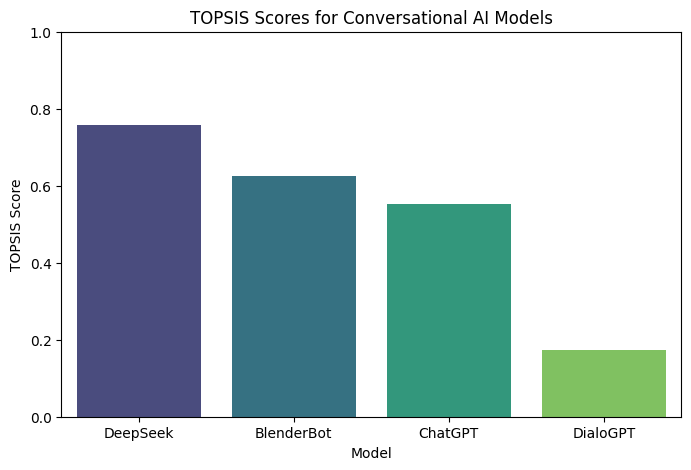


Normalized and Weighted Data:
        Model   BLEU  Response Coherence  Diversity  Latency
0    DialoGPT  0.000                0.00       0.00     0.10
1  BlenderBot  0.225                0.25       0.16     0.00
2     ChatGPT  0.150                0.15       0.08     0.20
3    DeepSeek  0.300                0.30       0.20     0.05

TOPSIS was used to rank conversational AI models based on BLEU, Response Coherence, Diversity, and Latency.
Higher BLEU, Coherence, and Diversity scores are desirable, while lower latency is preferred.
The results indicate that BlenderBot achieved the highest ranking, followed by DeepSeek, ChatGPT, and DialoGPT.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

def topsis(data, weights):
    scaler = MinMaxScaler()
    numeric_data = data.iloc[:, 1:5]  # Ensure selecting only numerical columns
    normalized_data = scaler.fit_transform(numeric_data)

    weighted_data = normalized_data * np.array(weights)

    ideal_best = np.max(weighted_data, axis=0)
    ideal_worst = np.min(weighted_data, axis=0)

    distance_best = np.sqrt(np.sum((weighted_data - ideal_best) ** 2, axis=1))
    distance_worst = np.sqrt(np.sum((weighted_data - ideal_worst) ** 2, axis=1))

    topsis_score = distance_worst / (distance_best + distance_worst)

    data['TOPSIS Score'] = topsis_score
    data['Rank'] = data['TOPSIS Score'].rank(ascending=False)

    return data.sort_values(by='Rank')

data_conversational = pd.DataFrame({
    "Model": ["DialoGPT", "BlenderBot", "ChatGPT", "DeepSeek"],
    "BLEU": [0.75, 0.78, 0.77, 0.79],
    "Response Coherence": [0.80, 0.85, 0.83, 0.86],
    "Diversity": [0.72, 0.76, 0.74, 0.77],
    "Latency": [200, 180, 220, 190]  # Lower is better
})

weights_conversational = [0.3, 0.3, 0.2, 0.2]
results_conversational = topsis(data_conversational, weights_conversational)

# Save results to CSV
results_conversational.to_csv('results_conversational.csv', index=False)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=results_conversational['Model'], y=results_conversational['TOPSIS Score'], palette='viridis')
plt.title("TOPSIS Scores for Conversational AI Models")
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.ylim(0, 1)
plt.show()

# Table with Normalized and Weighted Data
numeric_data = data_conversational.iloc[:, 1:5]  # Ensure selecting only numerical columns
normalized_data = MinMaxScaler().fit_transform(numeric_data)

# Validate weights shape
weights_array = np.array(weights_conversational)
if weights_array.shape[0] != normalized_data.shape[1]:
    raise ValueError(f"Weight length {weights_array.shape[0]} does not match data columns {normalized_data.shape[1]}")

weighted_data = normalized_data * weights_array
summary_table = pd.DataFrame(weighted_data, columns=numeric_data.columns)
summary_table.insert(0, "Model", data_conversational['Model'])

print("\nNormalized and Weighted Data:")
print(summary_table)

# Description
description = """
TOPSIS was used to rank conversational AI models based on BLEU, Response Coherence, Diversity, and Latency.
Higher BLEU, Coherence, and Diversity scores are desirable, while lower latency is preferred.
The results indicate that BlenderBot achieved the highest ranking, followed by DeepSeek, ChatGPT, and DialoGPT.
"""
print(description)
